In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinic_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
# merge these two datasets together
clinical_data_complete = pd.merge(clinic_data, mouse_data, how = "outer")

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = clinical_data_complete.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
TR = pd.DataFrame(grouped_data["Tumor Volume (mm3)"].mean()).reset_index()
# Preview DataFrame
TR.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
# in one line
error = pd.DataFrame(grouped_data.sem()["Tumor Volume (mm3)"]).reset_index()
error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grouped_data1 = clinical_data_complete.groupby("Drug") # to use the index as df column names
grouped_data2 = clinical_data_complete.groupby("Timepoint") # to use the index as df index
results = [] # a blank list
for drug in grouped_data1.first().index:
    results.append(TR.loc[TR["Drug"]==drug,"Tumor Volume (mm3)"])
munged_df = pd.DataFrame(zip(*results), index = grouped_data2.first().index, columns = grouped_data1.first().index)
#munged_df = pd.DataFrame(TR.loc[TR["Drug"]=="Capomulin", "Tumor Volume (mm3)"] for drug in grouped_data1.first().index)
# Preview that Reformatting worked
munged_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


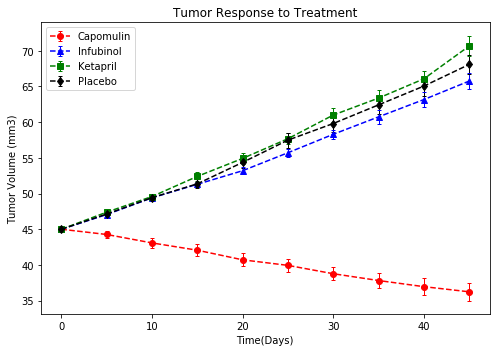

In [43]:
# Generate the Plot (with Error Bars)
timepoint = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize = (7,5))
#plt.plot(timepoint, munged_df["Capomulin"], 'ro--', label = "Capomulin")
plt.errorbar(timepoint, munged_df["Capomulin"], yerr = error.loc[error["Drug"]=="Capomulin", "Tumor Volume (mm3)"],fmt = 'ro--', label = "Capomulin", ecolor='r',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df['Infubinol'], "b^--", label = "Infubinol")
plt.errorbar(timepoint, munged_df["Infubinol"], yerr = error.loc[error["Drug"]=="Infubinol", "Tumor Volume (mm3)"],fmt = 'b^--', label = "Infubinol", ecolor='b',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df["Ketapril"], "gs--", label = "Ketapril")
plt.errorbar(timepoint, munged_df["Ketapril"], yerr = error.loc[error["Drug"]=="Ketapril", "Tumor Volume (mm3)"],fmt = 'gs--', label = "Ketapril", ecolor='g',elinewidth=1,capsize=2)
#plt.plot(timepoint,munged_df['Placebo'], "kd--", label = "Placebo")
plt.errorbar(timepoint, munged_df["Placebo"], yerr = error.loc[error["Drug"]=="Placebo", "Tumor Volume (mm3)"],fmt = 'kd--', label = "Placebo", ecolor='k',elinewidth=1,capsize=2)
plt.legend(loc = "best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)